###         CONTENT 
##### 1.0  IMPORTING LIBRARIES
##### 2.0  IMPORTING THE DATASET WITH SLECTED COLUMN FOR VISUALIZATION
##### 3.0  Department visualization
##### 4.0  Customer by Region
##### 5.0  Age-group pie chart
##### 6.0  Income_Range Visualization
##### 7.0 loyalty_flag Visualization
##### 8.0 Number of order by family Status
##### 9.0  Number of order by income_range
##### 10.0 Number of Order by days of the week Visualization
##### 11.0 Aggregation.


### 1.0. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

### 2.0. IMPORTING THE DATASET WITH SLECTED COLUMN FOR VISUALIZATION

In [2]:
df = pd.read_pickle('/Users/shaqurcasco/Downloads/CF_10_1_df_merged.pkl')

In [3]:
df= df.filter(['order_id', 'user_id',  'order_number',
       'order_days_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_name', 
       'department_id', 'prices', 'Busiest days',
       'Hour_of_day', 'max_order', 'loyalty_flag', 'Average_spender',
       'spending_flag', 'Median_customers', 'frequency_flag', 'Gender',
       'Age', 'No_of_dependants', 'family_status',
       'income', 'Region', 'department', 'age_group', 'income_Range',
       'Dependants'])

In [5]:
df.head(5)

,order_id,user_id,order_number,order_days_of_the_week,order_hour_of_day,days_since_prior_order,product_name,department_id,prices,Busiest days,...,Gender,Age,No_of_dependants,family_status,income,Region,department,age_group,income_Range,Dependants
0,2539329,1,1,2,8,NaN,Soda,7,9.0,Regularly busy,...,Female,31,3,married,40423,South_Region,beverages,Young Adult,25k-68k,Dependant
1,2398795,1,2,3,7,15.0,Soda,7,9.0,Least busy days,...,Female,31,3,married,40423,South_Region,beverages,Young Adult,25k-68k,Dependant
2,473747,1,3,3,12,21.0,Soda,7,9.0,Least busy days,...,Female,31,3,married,40423,South_Region,beverages,Young Adult,25k-68k,Dependant
3,2254736,1,4,4,7,29.0,Soda,7,9.0,Least busy days,...,Female,31,3,married,40423,South_Region,beverages,Young Adult,25k-68k,Dependant
4,431534,1,5,4,15,28.0,Soda,7,9.0,Least busy days,...,Female,31,3,married,40423,South_Region,beverages,Young Adult,25k-68k,Dependant


In [8]:
#checking the rows and columns of the filtered dataframe columns
df.shape

(30629741, 27)

### 3.0. Department visualization 

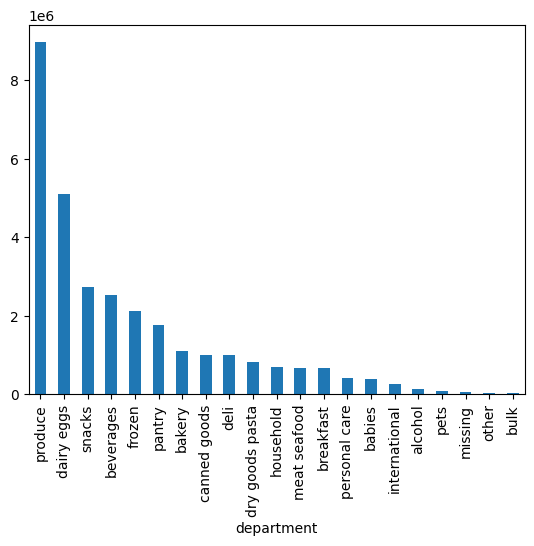

In [4]:
# Assigning the number of order by department
# ploting graph of number of count
department_bar = df['department'].value_counts().plot(kind='bar').
# saving the department bar
department_bar.figure.savefig('/Users/shaqurcasco/Downloads/department_bar.png')

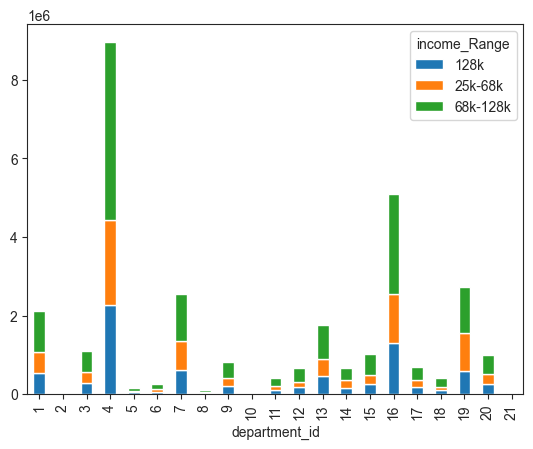

In [12]:
# Assigning the number of order by department based on income range
# make a stacked bar chart of dept and loyalty
income_Range_on_department = df.groupby(['department_id','income_Range']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
income_Range_department = income_Range_on_department.plot.bar(stacked=True)

# Saving the department chart
income_Range_department.figure.savefig('/Users/shaqurcasco/Downloads/income_Range_department.png')

###### from the chart, the produce department have the highest frequency, therefore they are most popular department in instacart store 

In [71]:
# Assigning the number of order by department based on loyalty flag
# make a stacked bar chart of dept and loyalty
loyalty_based_on_department = df.groupby(['department_id','loyalty_flag']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
dept_loyalty = loyalty_based_on_department.plot.bar(stacked=True)

# Saving the department chart
dept_loyalty.figure.savefig('/Users/shaqurcasco/Downloads/dept_loyalty.png')

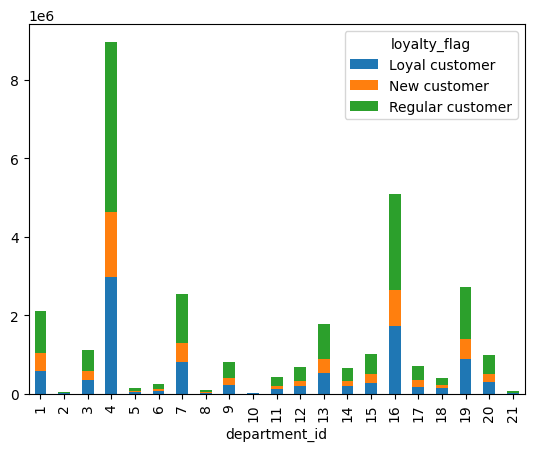

######  The bar chart shows most of the loyal, new and regular customer customers shop on the produce department and Dairy/Eggs



1  = Frozen
2  = Other 
3  = Bakery 
4  = Produce 
5  = Alcohol
6  = International
7  ='Beverages 
8  = Pets
9  = Dry Goods Pasta
10 = Bulk 
11 = Personal Care',
12 = Meat/Seafood 
13 = Pantry 
14 = Breakfast 
15 = Canned Goods 
16 = Dairy/Eggs 
17 = Household  
18 = Babies  
19 = Snacks 
20 = Deli
21 = Missing

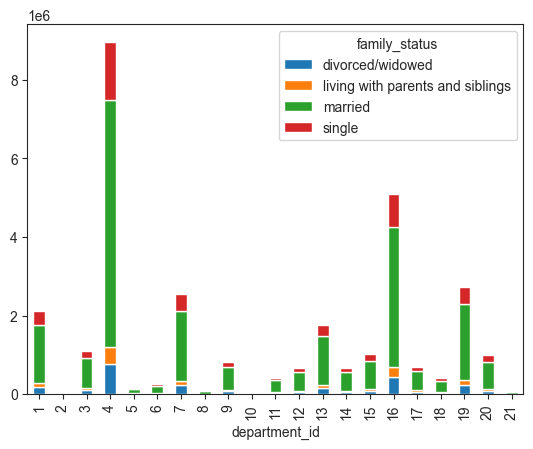

In [13]:
## Assigning the number of order by department based on family_status
# make a stacked bar chart of dept and loyalty
family_status_on_department = df.groupby(['department_id','family_status']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
family_status_department = family_status_on_department.plot.bar(stacked=True)

# Saving the department chart
family_status_department.figure.savefig('/Users/shaqurcasco/Downloads/family_status_department.png')

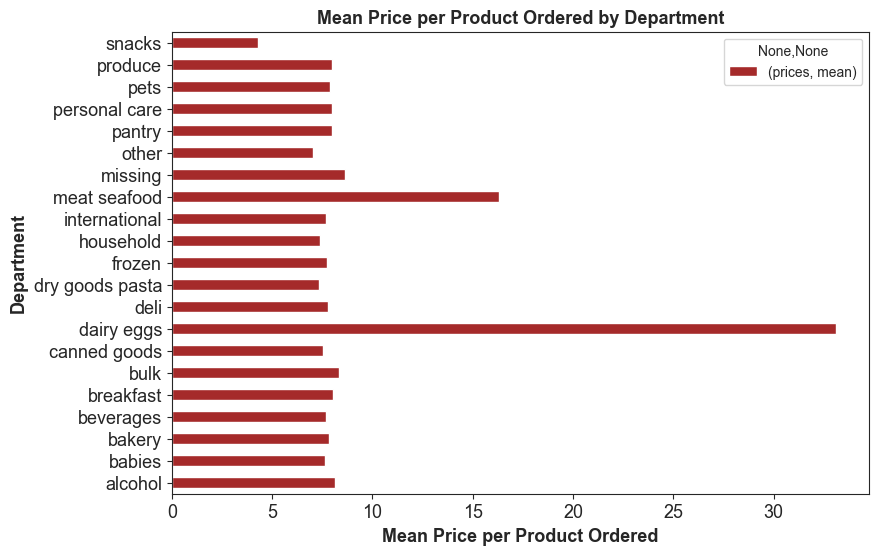

In [79]:
#average price per item sold by department
dept_avgprice = df.groupby('department').agg({'prices': ['mean']})

#Bar chart of average price per departments by products ordered
bar_dept_price = dept_avgprice.plot.barh(figsize = (9,6), color = ['brown'])
sns.set_style('ticks')
plt.xlabel('Mean Price per Product Ordered', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Mean Price per Product Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

# saving the bar chart of price and department
bar_dept_price.figure.savefig('/Users/shaqurcasco/Downloads/dept_avgprice.png')

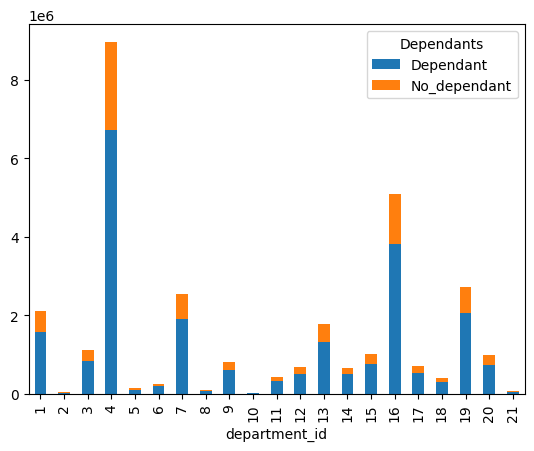

In [73]:
# Assigning the number of order by department based on Dependants
# make a stacked bar chart of dept and loyalty
department_Dependants = df.groupby(['department_id','Dependants']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
dept_Dependants = department_Dependants.plot.bar(stacked=True)

# saving the bar chart of price and department
dept_Dependants.figure.savefig('/Users/shaqurcasco/Downloads/dept_Dependants.png')

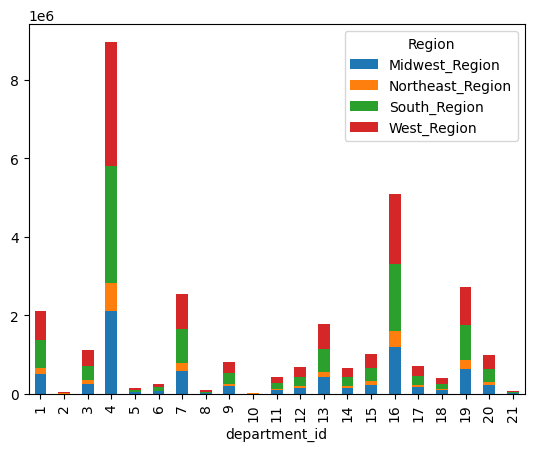

In [12]:
# # Assigning the number of order by department based on Region
#trying to make a stacked bar chart of dept and loyalty
Region_based_on_department = df.groupby(['department_id','Region']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
dept_Region = Region_based_on_department.plot.bar(stacked=True)

# Saving the department chart
department_Region.figure.savefig('/Users/shaqurcasco/Downloads/department_Region.png')


### 4.0.Customer by Region

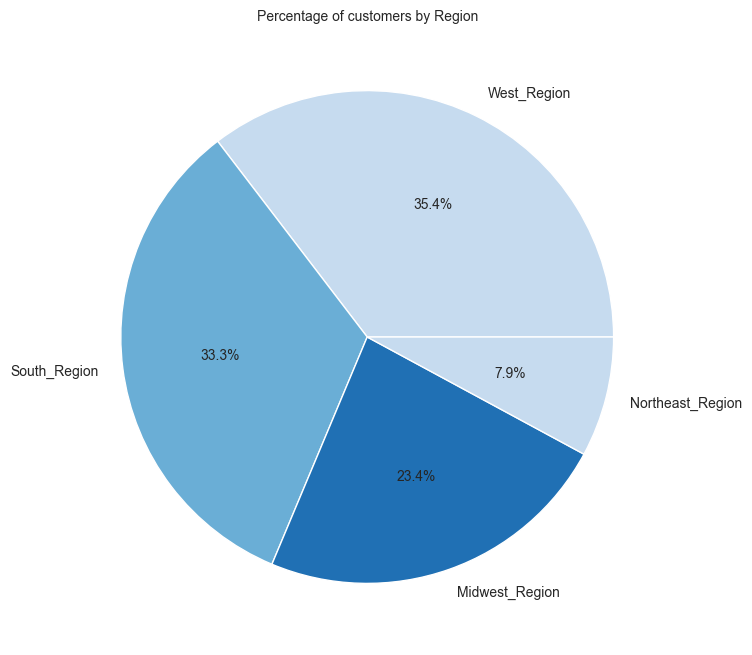

In [8]:
#Age group Visualization
pie_user_age = df['Region'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Blues', 3), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customers by Region',fontsize=10)
plt.show()

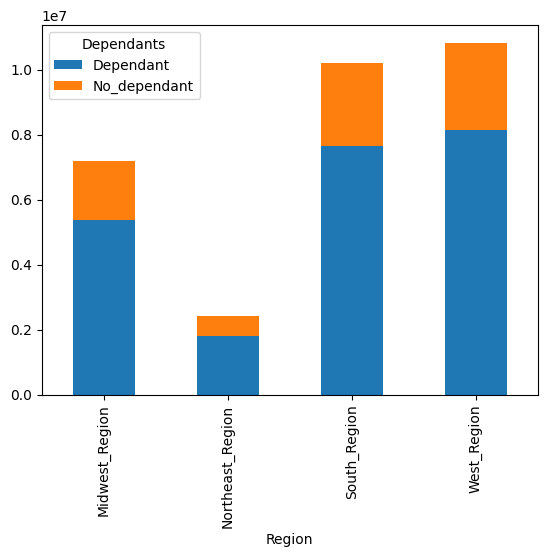

In [64]:
#  Assigning the number of order by Region based dependants
Region_based_Dependants = df.groupby(['Region','Dependants']).size().unstack(fill_value=0)

#stacked bar chart for region by dependant
Region_based_Dependants = Region_based_Dependants.plot.bar(stacked=True)

# saving the pie chart of customners by region
Region_based_Dependants.figure.savefig('/Users/shaqurcasco/Downloads/Region_based_Dependants.png')

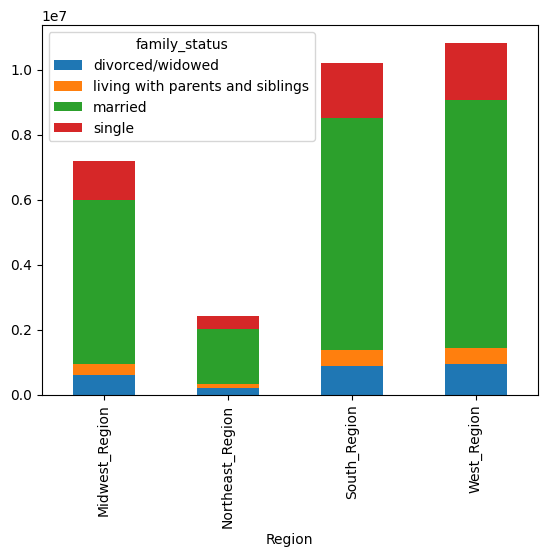

In [67]:
#Assigning the number of order by Region based family status
familystatus_Region = df.groupby(['Region','family_status']).size().unstack(fill_value=0)

#stacked bar chart for region by dependant
familystatus_Region_bar = familystatus_Region.plot.bar(stacked=True)

# saving the pie chart of customners by region
familystatus_Region_bar.figure.savefig('/Users/shaqurcasco/Downloads/familystatus_Region.png')

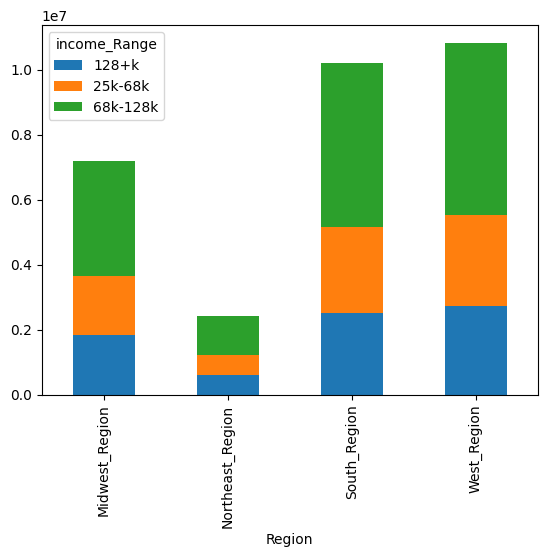

In [70]:
# Assigning the number of order by Region based income_Range
Region_based_income_Range = df.groupby(['Region','income_Range']).size().unstack(fill_value=0)

#stacked bar chart for Region_based_income_Range
Region_based_income_Range_bar = Region_based_income_Range.plot.bar(stacked=True)

# saving the pie chart of customners by region
Region_based_income_Range_bar.figure.savefig('/Users/shaqurcasco/Downloads/Region_based_income_Range_bar.png')

### 5 Age-group pie chart

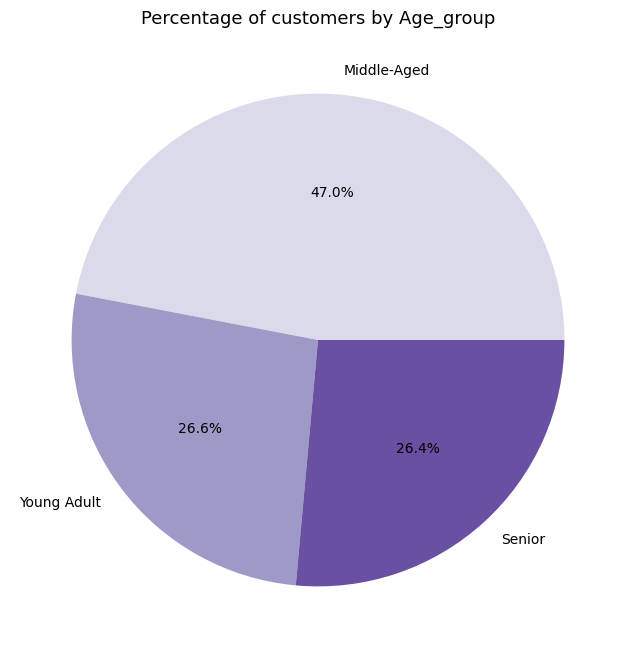

In [30]:
#Age group Visualization
pie_customer_age_group = df['age_group'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Purples', 3), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customers by Age_group',fontsize=13)
plt.show()

# saving the pie chart of customners by age-group
pie_customer_age_group.figure.savefig('/Users/shaqurcasco/Downloads/pie_customer_age_group.png')

In [46]:
# correcting the string in income_group 128k to 128+
df.replace('128k','128+k', inplace = True)

In [47]:
#checking the frequency of the age group
df['income_Range'].value_counts()

income_Range
68k-128k    15063447
25k-68k      7919442
128+k        7646852
Name: count, dtype: int64

### 6.0. INCOME_RANGE VISUALIZATION 

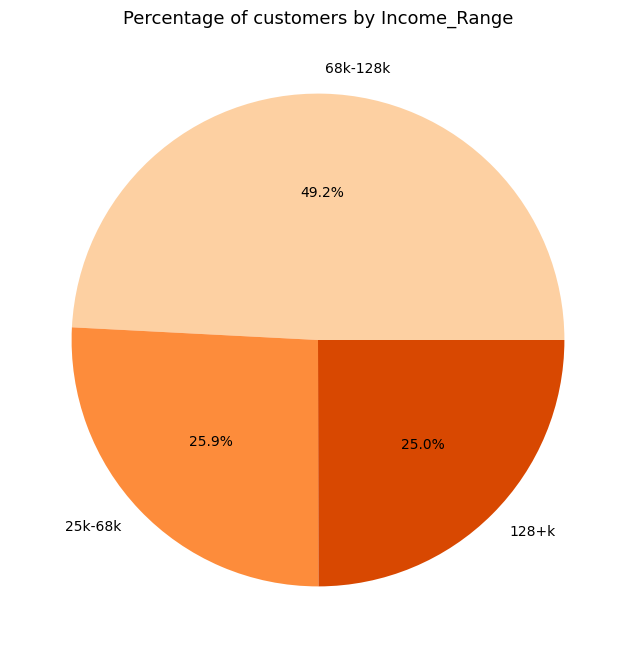

In [48]:
#Income_range Visualization
pie_customer_income_Range = df['income_Range'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Oranges', 3), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customers by Income_Range',fontsize=13)
plt.show()

# saving the pie chart of customners by age-group
pie_customer_income_Range.figure.savefig('/Users/shaqurcasco/Downloads/pie_customer_income_Range.png')

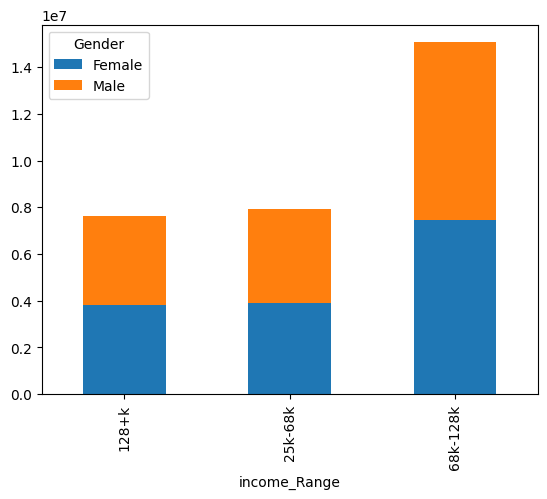

In [77]:
#Assigning the number of order by income range based on Gender
Income_Range_Gender = df.groupby(['income_Range','Gender']).size().unstack(fill_value=0)

#stacked bar chart for income_range by Gender
Income_Range_Gender_bar = Income_Range_Gender.plot.bar(stacked=True)

 # saving the pie chart of customners by age-group
Income_Range_Gender_bar.figure.savefig('/Users/shaqurcasco/Downloads/Income_Range_Gender_bar.png')

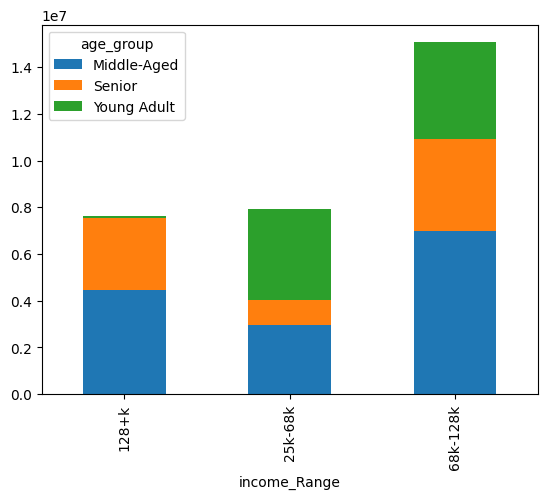

In [79]:
#Assigning the number of order by income range based on age group
Income_Range_age_group = df.groupby(['income_Range','age_group']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
Income_Range_age_group_bar = Income_Range_age_group.plot.bar(stacked=True)

 # saving the pie chart of customners by age-group
Income_Range_age_group_bar.figure.savefig('/Users/shaqurcasco/Downloads/Income_Range_age_group_bar.png')

### 7.0 loyalty_flag Visualization

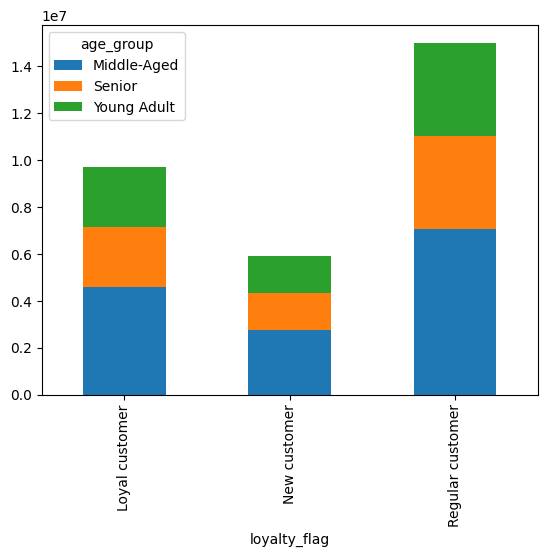

In [60]:
#Assigning the number of order by loyalty flag based on Age group
loyal_age_grp = df.groupby(['loyalty_flag','age_group']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
dept_loyalty = loyal_age_grp.plot.bar(stacked=True)

# saving the pie chart of loyalty by age group
dept_loyalty.figure.savefig('/Users/shaqurcasco/Downloads/loyal_age_grp.png')

###### The middle_aged group occupied the loyalty_flag , followed by senior , they occupied the regular and loyal customers.

### 8.0 Number of order by family Status

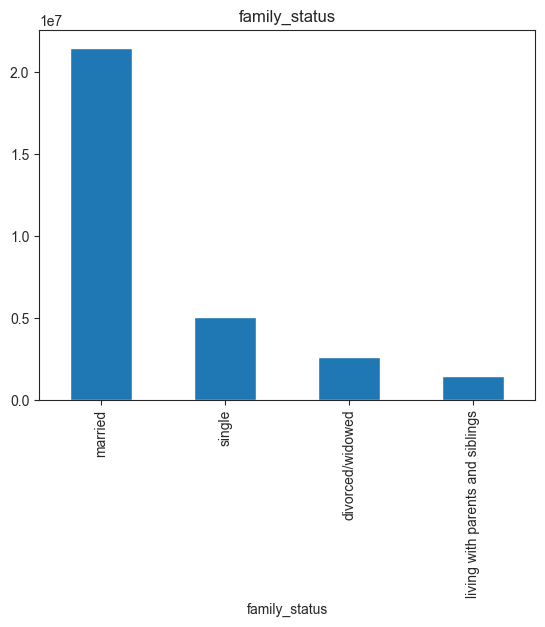

In [15]:
family = df['family_status'].value_counts().plot.bar(title = 'family_status')

### 9.0 Number of order by income_range 

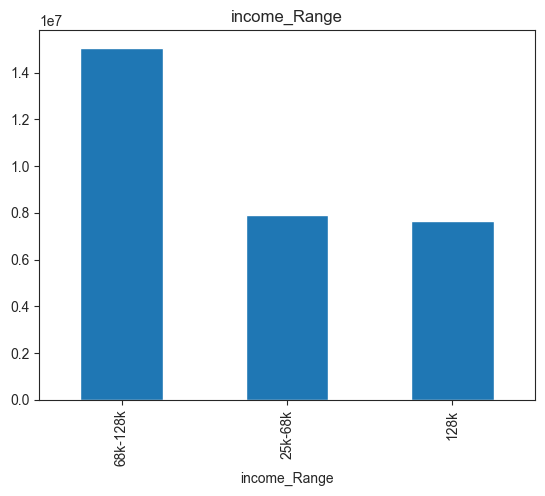

In [16]:
income_Range = df['income_Range'].value_counts().plot.bar(title = 'income_Range')

### 10.0 Number of Order  by days of the week Visualization

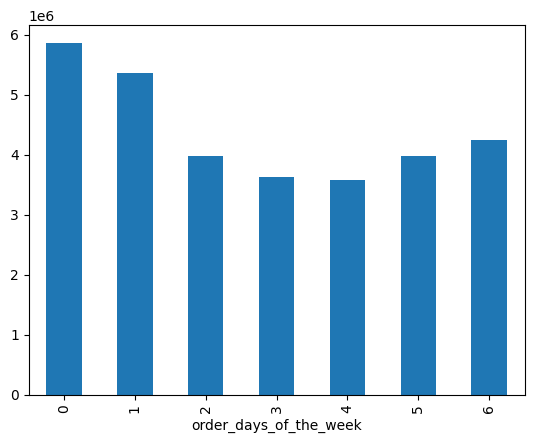

In [83]:
#Assigning the number of order by days of the week 
bar_dow = df['order_days_of_the_week'].value_counts().sort_index().plot.bar()

# saving the pie chart of loyalty by age group
bar_dow.figure.savefig('/Users/shaqurcasco/Downloads/bar_dow.png')

###### 0 : Saturday, 1: Sunday ,2: Monday, 3 : Tuesday, 4 : Wednesday, 5: Thursday, 6 : Friday
 

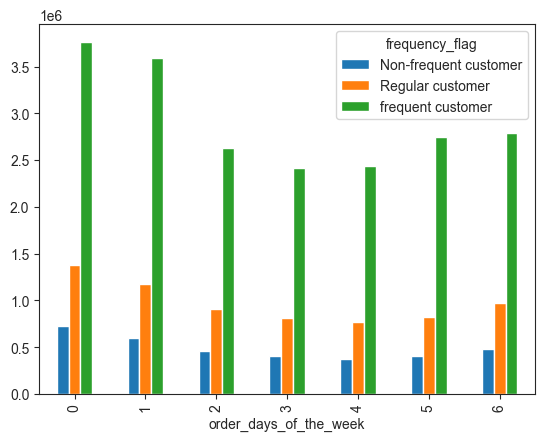

In [86]:
#tAssigning the number of order by days of the week based on frquency flag 
order_dow_frequency_flag = df.groupby(['order_days_of_the_week','frequency_flag']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
order_dow_frequency_flag_bar = order_dow_frequency_flag.plot.bar(stacked=False)

 # saving the pie chart of customners by age-group
order_dow_frequency_flag_bar.figure.savefig('/Users/shaqurcasco/Downloads/order_dow_frequency_flag_bar.png')

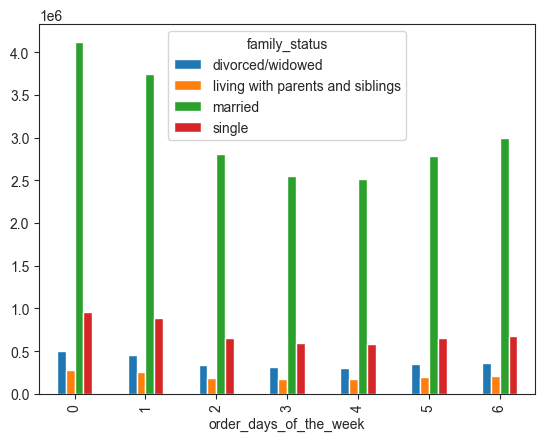

In [17]:
#Assigning the number of order by days of the week  based on family status
order_dow_family_status = df.groupby(['order_days_of_the_week','family_status']).size().unstack(fill_value=0)

#stacked bar chart for loyalty and dept
order_dow_family_status_bar = order_dow_family_status.plot.bar(stacked=False)

 # saving the pie chart of customners by age-group
order_dow_family_status_bar.figure.savefig('/Users/shaqurcasco/Downloads/order_dow_family_status_bar.png')

 ### 11. 0 Aggregations

In [91]:
# Grouping age_group by prices and days since prior order mean, min, max 
df.groupby('age_group').agg({'prices':[ 'mean', 'max','min'], 'days_since_prior_order': ['mean', 'max','min']})

prices               days_since_prior_order           
                  mean      max  min                   mean   max  min
age_group                                                             
Middle-Aged  11.979723  99999.0  1.0              11.114926  30.0  0.0
Senior       11.610695  99999.0  1.0              11.080959  30.0  0.0
Young Adult  12.110027  99999.0  1.0              11.132158  30.0  0.0

In [90]:
# Grouping family by prices mean, max and min
df.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
family_status                                            
divorced/widowed                  11.510816  1.0  99999.0
living with parents and siblings  10.958550  1.0  99999.0
married                           11.894704  1.0  99999.0
single                            12.504895  1.0  99999.0